# Sunburst Plot

The figure below is a sunburst plot showing the total number of video game consoles sold by Nintendo, Microsoft and Sony. The inner ring shows the total number of consoles sold per company, and the outer ring refines each company into their individual consoles.

![example_1](images/example_1.png)

Recreate the above sunburst plot using Matplotlib. The arc length of each wedge should be proportional to the number of units sold. Importantly, the outer ring should be aligned with the inner ring. For example, all of the Nintendo consoles on the outer ring should be within the arc spanned by Nintendo.

The consoles on the outer ring should be ordered from largest number of units sold to smallest number of units sold in a clockwise fashion. The four consoles with the smallest number of units sold for Nintendo are not displayed (since that would create visual clutter).

The colours of the inner ring are [#156eaf, #db2018, #56b45b] for Microsoft, Nintendo and Sony, and [#5599cc, #ea6727, #83c143] for the outer ring.

The edge colours of the wedges should be white. The labels of the inner ring should be white in colour and on the interior, and the labels of the outer ring on the exterior.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
from scipy import stats
import os

In [128]:
colors_inner = ["#156eaf", "#db2018", "#56b45b"]
colors_outer = ["#5599cc", "#ea6727", "#83c143"]

In [129]:
from PIL import ImageColor

## Sunburst function

In [130]:
def sunburst(nodes, dic, total=np.pi * 2, offset=0, level=0, ax=None, text_smaller=False):

    ax = ax or plt.subplot(111, projection='polar')

    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        # ax.bar([0], [0.5], [np.pi *2], color="white")
        # ax.text(0, 0, label, ha='center', va='center', fontsize=15)
        if text_smaller:
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax, text_smaller=True)
        else: 
            sunburst(subnodes, dic, total=value, level=level + 1, ax=ax)
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)

            if text_smaller:
                sunburst(subnodes, dic, total=total, offset=local_offset,
                     level=level + 1, ax=ax, text_smaller=True)
            else: 
                sunburst(subnodes, dic, total=total, offset=local_offset, level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5

        rects = ax.bar(values, heights, widths, bottoms, linewidth=0,
                       edgecolor='white', align='edge')
   
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            if text_smaller:
                if len(label)>18:
                    name = str(label).split(" ")
                    name.insert(-1,"\n")
                    new_label = " ".join(name)
                else: 
                    new_label = label
            else:
                new_label = label
            ax.text(x, y, new_label, rotation=rotation, ha='center', va='center', fontsize=15)
            try:
                rect.set_color(np.array(ImageColor.getrgb(dic[label]))/256.0)
            except KeyError:
                pass

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()
        
def itemfreq(a):
    items, inv = np.unique(a, return_inverse=True)
    freq = np.bincount(inv)
    return np.array([items, freq]).T

def get_data_list(level_1, level_2):

    group_freq = itemfreq(level_1)

    data = []
    for i in group_freq:
        inner_list = []
        filtered_level_2 = level_2[np.where(level_1==i[0])]
        for j in itemfreq(filtered_level_2):
            inner_inner_list = []
            
            tup = (j[0], int(j[1]), inner_inner_list)
            inner_list.append(tup)
        data.append((i[0],int(i[1]), inner_list))
        

    data_final = [("All data", len(level_1), data)]
    
    return data_final


## Load your data here

In [131]:
example_data = pd.read_csv("consoles.csv")
example_data.head()

,Platform,Type,Company,Released,Units sold
0,Color TV-Game,Dedicated,Nintendo,1977,3000000
1,Game & Watch,Dedicated handheld,Nintendo,1980,43400000
2,NES/Famicom,Home,Nintendo,1983,61910000
3,Famicom Disk System,Home console add-on,Nintendo,1986,4500000
4,Game Boy & Game Boy Color,Handheld,Nintendo,1989,118690000


### Select columns for each level of the circle plot

In [132]:
first_level = example_data["Company"].values 
second_level = example_data["Platform"].values


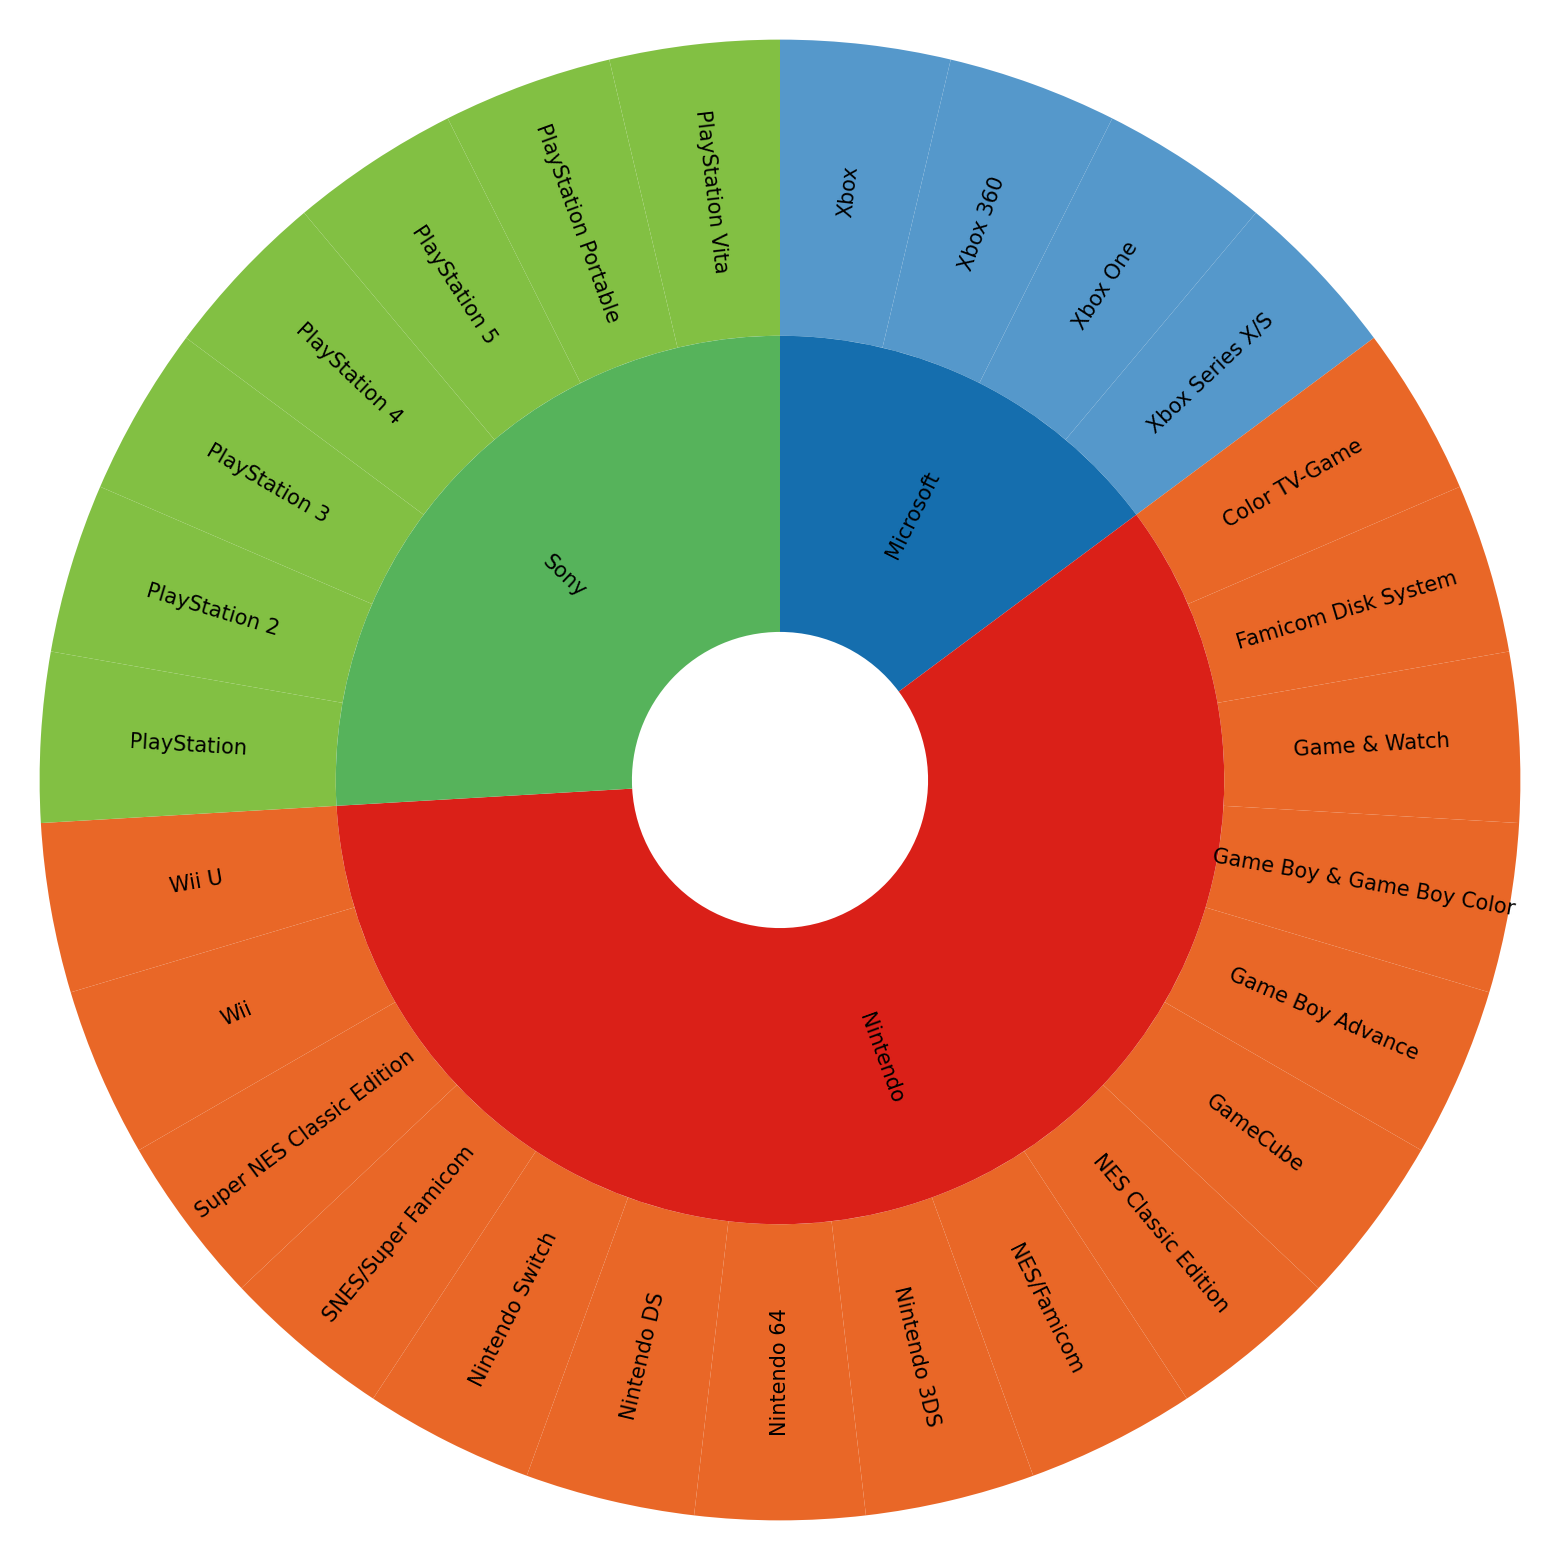

In [133]:
data_sunburst = get_data_list(first_level, second_level)

color_dic={'Microsoft': '#156eaf', 'Nintendo': '#db2018', 'Sony': '#56b45b', 'Color TV-Game': '#ea6727', 'Famicom Disk System': '#ea6727', 'Game & Watch': '#ea6727', 'Game Boy & Game Boy Color': '#ea6727', 'Game Boy Advance': '#ea6727', 'GameCube': '#ea6727', 'NES Classic Edition': '#ea6727', 'NES/Famicom': '#ea6727', 'Nintendo 3DS': '#ea6727', 'Nintendo 64': '#ea6727', 'Nintendo DS': '#ea6727', 'Nintendo Switch': '#ea6727', 'PlayStation':'#83c143', 'PlayStation 2': '#83c143', 'PlayStation 3': '#83c143', 'PlayStation 4': '#83c143', 'PlayStation 5': '#83c143', 'PlayStation Portable': '#83c143', 'PlayStation Vita':'#83c143', 'SNES/Super Famicom': '#ea6727', 'Super NES Classic Edition': '#ea6727', 'Wii':'#ea6727', 'Wii U': '#ea6727', 'Xbox': '#5599cc', 'Xbox 360': '#5599cc', 'Xbox One':'#5599cc', 'Xbox Series X/S': '#5599cc'}

plt.figure(figsize = (20,20))
sunburst(data_sunburst, color_dic)
plt.show()